# [Ito_Integral](https://youtu.be/3_ufgOnxLdc)

$$
\int_0^T B_t dB_t,\quad
\int_0^T tB_t dB_t,\quad
\int_0^T t^2B_t dB_t,\quad
\int_0^T tB_t^2 dB_t,\quad
\int_0^T t e^{B_t} dB_t
$$

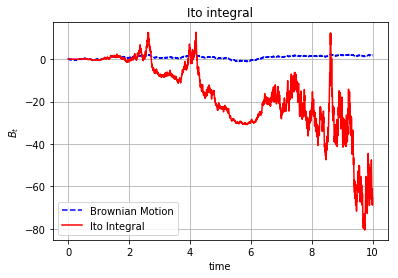

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21
num_years = 10
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_steps_per_year*num_years, ))
c = np.ones_like(u)
c[u < 0.5] = -1

# Brownian motion
b = np.cumsum(c) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0)

# time
t = np.linspace(0, num_years, num_steps_per_year*num_years + 1)  

# db
db = c / np.sqrt(num_steps_per_year) 

# integrand or betting
if 0:
    # B_t
    betting = b[:-1]
elif 0:
    # tB_t
    betting = t[:-1] * b[:-1]
elif 0:
    # t^2 B_t
    betting = (t[:-1]**2) * b[:-1]
elif 0:
    # tB_t^2
    betting = t[:-1] * (b[:-1]**2)
elif 1:
    # t e^{B_t}
    betting = t[:-1] * np.exp(b[:-1])
    
# Ito integral or total cumulative P&L
ito = np.cumsum(betting * db)
ito = np.insert(ito, 0, 0)

# plot of Brownian motion 
plt.plot(t,b,'--b',label='Brownian Motion')
plt.plot(t,ito,'r',label='Ito Integral')
plt.title('Ito integral')
plt.xlabel('time')
plt.ylabel('$B_t$')
plt.grid(True)
plt.legend()
plt.show()

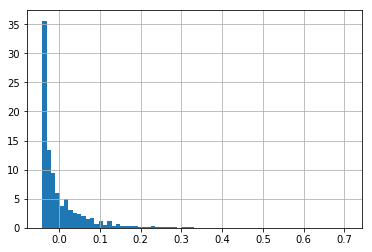

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21*100
num_years = 1/12
num_simulation = 10000 
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_simulation, int(num_steps_per_year*num_years)))
c = np.ones_like(u)
c[u < 0.5] = -1.
# print(c.shape) # (2520,)
# print(c.dtype) # float64

# Brownian motion
b = np.cumsum(c, axis=1) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0, axis=1)
# print(b.shape) # (2520,)
# print(b.dtype) # float64

# # time
t = np.linspace(0, num_years, int(num_steps_per_year*num_years) + 1) 

# dt
dt = 1 / num_steps_per_year

# db
db = c / np.sqrt(num_steps_per_year) 

# integrand or betting
if 1:
    # B_t
    betting = b[:, :-1]
elif 0:
    # tB_t
    betting = t[:-1] * b[:, :-1]
elif 1:
    # t^2 B_t
    betting = (t[:-1]**2) * b[:, :-1]
elif 0:
    # tB_t^2
    betting = t[:-1] * (b[:, :-1]**2)
elif 1:
    # t e^{B_t}
    betting = t[:-1] * np.exp(b[:, :-1])

# Ito integral or total cumulative P&L
ito = np.cumsum(betting * db, axis=1)
ito = np.insert(ito, 0, 0, axis=1)

# histogram of S_10
plt.hist(ito[:,-1], bins=70, density=True)
plt.grid(True)
plt.show()